# Dwarf Mass Limits & Optical Velocity

# Project Notes

NearbyGalaxies - master table (does not include optical velocities)
NearbyGalaxiesSE - identifies HI data source, fills in velocity reference, notes

Images has example image checks for detection
See overleaf for methodology for limits

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb

In [2]:
NearbyGalaxies = pd.read_csv("./NearbyGalaxiese_trim_clean.dat", delim_whitespace=True ,header=(0))

In [3]:
NearbyGalaxies

,GalaxyName,RA1,RA2,RA3,Dec1,Dec2,Dec3,M-m,mystery1,mystery2,vh(km/s),mystery3,mystery4,MHI,Data,Notes
0,CanisMajor,7,12,35.0,-27,40,0,14.29,0.30,0.30,87.0,99.9,99.9,99.90,H,SKIP-FLUFFY STREAM
1,SagittariusdSph,18,55,19.5,-30,32,43,17.10,0.15,0.15,140.0,0.0,99.9,99.90,H,(I don’t understand where the limit in GP or M...
2,TucanaIII,23,56,36.0,-59,36,0,17.01,0.16,0.16,999.9,99.9,99.9,99.90,H,"- Simon et al. 2017 V_hel = -102 km/s, velocit..."
3,DracoII,15,52,47.6,64,33,55,16.90,0.30,0.30,999.9,99.9,99.9,99.90,H,"- Martin et al. 2016 V_hel -347 km/s, dispersi..."
4,Segue(I),10,7,4.0,16,4,55,16.80,0.20,0.20,208.5,0.0,99.9,99.90,g30dr1,148+18s.mir stdev (0.04K/9.1K/Jy)*5 = 0.02 Jy ...
5,Reticulum2,3,35,42.1,-54,2,57,17.40,0.20,0.20,999.9,99.9,99.9,99.90,h,"- Walker et al., Koposov et al. (2015), V_hel=..."
6,CetusII,1,17,52.8,-17,25,12,17.38,0.19,0.19,999.9,99.9,99.9,99.90,h,NEW not seeing velocity ref for this one
7,TriangulumII,2,13,17.4,36,10,42,17.40,0.10,0.10,999.9,99.9,99.9,99.90,g3dr2,"36+34s.mir Martin et al. v_hel = -384 km/s, d..."
8,UrsaMajorII,8,51,30.0,63,7,48,17.50,0.30,0.30,-116.5,1.9,1.9,0.00,h,"130.0 60.0 CAR CAR_H07.fits stdev 0.02K, if b..."
9,BootesII,13,58,0.0,12,51,0,18.10,0.06,0.06,-117.0,5.2,5.2,0.00,g1dr2,212+10s.mir stdev 0.08K (rounded up)


In [4]:
NearbyGalaxies.columns

Index(['GalaxyName', 'RA1', 'RA2', 'RA3', 'Dec1', 'Dec2', 'Dec3', 'M-m',
       'mystery1', 'mystery2', 'vh(km/s)', 'mystery3', 'mystery4', 'MHI',
       'Data', 'Notes'],
      dtype='object')

## Merge with SE file

NOTE: Edited Ursa Major for extra columns - check why

In [5]:
gals_added_data = pd.read_csv("./NearbyGalaxiese_trim_clean.dat", delim_whitespace=True,index_col=False)

In [6]:
gals_merged = pd.merge(NearbyGalaxies, gals_added_data, how='inner', on='GalaxyName')

In [7]:
gals_merged.columns

Index(['GalaxyName', 'RA1_x', 'RA2_x', 'RA3_x', 'Dec1_x', 'Dec2_x', 'Dec3_x',
       'M-m_x', 'mystery1_x', 'mystery2_x', 'vh(km/s)_x', 'mystery3_x',
       'mystery4_x', 'MHI_x', 'Data_x', 'Notes_x', 'RA1_y', 'RA2_y', 'RA3_y',
       'Dec1_y', 'Dec2_y', 'Dec3_y', 'M-m_y', 'mystery1_y', 'mystery2_y',
       'vh(km/s)_y', 'mystery3_y', 'mystery4_y', 'MHI_y', 'Data_y', 'Notes_y'],
      dtype='object')

In [8]:
gals_merged[['GalaxyName','MHI_x','MHI_y']]

,GalaxyName,MHI_x,MHI_y
0,CanisMajor,99.90,99.90
1,SagittariusdSph,99.90,99.90
2,TucanaIII,99.90,99.90
3,DracoII,99.90,99.90
4,Segue(I),99.90,99.90
5,Reticulum2,99.90,99.90
6,CetusII,99.90,99.90
7,TriangulumII,99.90,99.90
8,UrsaMajorII,0.00,0.00
9,BootesII,0.00,0.00


In [9]:
gals_merged[gals_merged['MHI_x'] != gals_merged['MHI_y']]

,GalaxyName,RA1_x,RA2_x,RA3_x,Dec1_x,Dec2_x,Dec3_x,M-m_x,mystery1_x,mystery2_x,...,Dec3_y,M-m_y,mystery1_y,mystery2_y,vh(km/s)_y,mystery3_y,mystery4_y,MHI_y,Data_y,Notes_y


NameError: name 'gals_w_NHI' is not defined

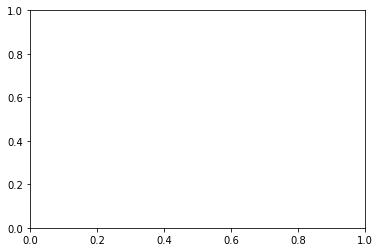

In [10]:
fig = plt.figure()
ax = plt.gca()
ax.plot(gals_w_NHI['(m-M)o'] ,gals_w_NHI['MHI'], 'o', c='blue', markeredgecolor='none')


NameError: name 'gals_w_NHI' is not defined

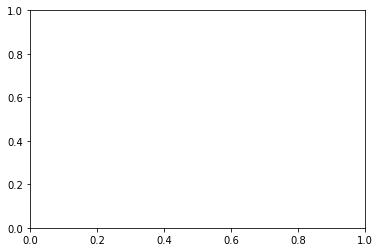

In [11]:
fig = plt.figure()
ax = plt.gca()
ax.plot(gals_w_NHI['(m-M)o'] ,gals_w_NHI['MHI'], 'o', c='blue', markeredgecolor='none')
ax.set_yscale('log')
#ax.set_xscale('log')

In [12]:
gals_merged.columns

Index(['GalaxyName', 'RA1_x', 'RA2_x', 'RA3_x', 'Dec1_x', 'Dec2_x', 'Dec3_x',
       'M-m_x', 'mystery1_x', 'mystery2_x', 'vh(km/s)_x', 'mystery3_x',
       'mystery4_x', 'MHI_x', 'Data_x', 'Notes_x', 'RA1_y', 'RA2_y', 'RA3_y',
       'Dec1_y', 'Dec2_y', 'Dec3_y', 'M-m_y', 'mystery1_y', 'mystery2_y',
       'vh(km/s)_y', 'mystery3_y', 'mystery4_y', 'MHI_y', 'Data_y', 'Notes_y'],
      dtype='object')

In [13]:
gals_merged[['GalaxyName','vh(km/s)_x','vh(km/s)_y']]

,GalaxyName,vh(km/s)_x,vh(km/s)_y
0,CanisMajor,87.0,87.0
1,SagittariusdSph,140.0,140.0
2,TucanaIII,999.9,999.9
3,DracoII,999.9,999.9
4,Segue(I),208.5,208.5
5,Reticulum2,999.9,999.9
6,CetusII,999.9,999.9
7,TriangulumII,999.9,999.9
8,UrsaMajorII,-116.5,-116.5
9,BootesII,-117.0,-117.0


In [14]:
gals_merged

,GalaxyName,RA1_x,RA2_x,RA3_x,Dec1_x,Dec2_x,Dec3_x,M-m_x,mystery1_x,mystery2_x,...,Dec3_y,M-m_y,mystery1_y,mystery2_y,vh(km/s)_y,mystery3_y,mystery4_y,MHI_y,Data_y,Notes_y
0,CanisMajor,7,12,35.0,-27,40,0,14.29,0.30,0.30,...,0,14.29,0.30,0.30,87.0,99.9,99.9,99.90,H,SKIP-FLUFFY STREAM
1,SagittariusdSph,18,55,19.5,-30,32,43,17.10,0.15,0.15,...,43,17.10,0.15,0.15,140.0,0.0,99.9,99.90,H,(I don’t understand where the limit in GP or M...
2,TucanaIII,23,56,36.0,-59,36,0,17.01,0.16,0.16,...,0,17.01,0.16,0.16,999.9,99.9,99.9,99.90,H,"- Simon et al. 2017 V_hel = -102 km/s, velocit..."
3,DracoII,15,52,47.6,64,33,55,16.90,0.30,0.30,...,55,16.90,0.30,0.30,999.9,99.9,99.9,99.90,H,"- Martin et al. 2016 V_hel -347 km/s, dispersi..."
4,Segue(I),10,7,4.0,16,4,55,16.80,0.20,0.20,...,55,16.80,0.20,0.20,208.5,0.0,99.9,99.90,g30dr1,148+18s.mir stdev (0.04K/9.1K/Jy)*5 = 0.02 Jy ...
5,Reticulum2,3,35,42.1,-54,2,57,17.40,0.20,0.20,...,57,17.40,0.20,0.20,999.9,99.9,99.9,99.90,h,"- Walker et al., Koposov et al. (2015), V_hel=..."
6,CetusII,1,17,52.8,-17,25,12,17.38,0.19,0.19,...,12,17.38,0.19,0.19,999.9,99.9,99.9,99.90,h,NEW not seeing velocity ref for this one
7,TriangulumII,2,13,17.4,36,10,42,17.40,0.10,0.10,...,42,17.40,0.10,0.10,999.9,99.9,99.9,99.90,g3dr2,"36+34s.mir Martin et al. v_hel = -384 km/s, d..."
8,UrsaMajorII,8,51,30.0,63,7,48,17.50,0.30,0.30,...,48,17.50,0.30,0.30,-116.5,1.9,1.9,0.00,h,"130.0 60.0 CAR CAR_H07.fits stdev 0.02K, if b..."
9,BootesII,13,58,0.0,12,51,0,18.10,0.06,0.06,...,0,18.10,0.06,0.06,-117.0,5.2,5.2,0.00,g1dr2,212+10s.mir stdev 0.08K (rounded up)


# Plot m-M vs. MHI

KeyError: '(m-M)o'

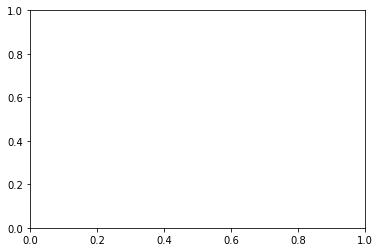

In [15]:
fig = plt.figure()
ax = plt.gca()
ax.plot(gals_merged['(m-M)o'] ,gals_merged['MHI_x'], 'o', c='blue')
#for i, gals_merged['GalaxyName'] in enumerate(gals_merged['GalaxyName']):
#    ax.annotate(labels, (gals_merged["(m-M)o"].iat[i],gals_merged["MHI_x"].iat[i]))
ax.set_xlim((0, 30))

In [ ]:
gals_cleaned = gals_merged[gals_merged['(m-M)o'] != 99.99]
gals_cleaned = gals_merged[gals_merged['vh(km/s)_x'] != 999.9]

In [16]:
gals_cleaned = gals_merged[gals_merged['vh(km/s)_x'] != 999.9]

In [17]:
gals_cleaned = gals_cleaned[gals_cleaned['(m-M)o'].notnull()]

KeyError: '(m-M)o'

In [18]:
gals_cleaned['(m-M)o'].unique()

KeyError: '(m-M)o'

KeyError: "['(m-M)o'] not in index"

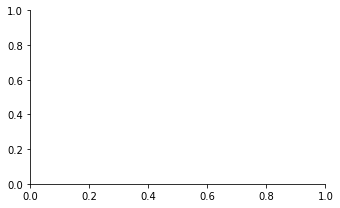

In [19]:
#color by velocity
fg = sb.FacetGrid(data=gals_cleaned, hue='vh(km/s)_x', aspect=1.61)
fg.map(plt.scatter, '(m-M)o', 'MHI_x')
#.add_legend()

In [ ]:
gals_merged.columns

In [20]:
gals_knownsource = gals_merged[gals_merged['Data_y'].notnull()]

In [21]:
gals_knownsource['Data_y'].unique()

array(['H', 'g30dr1', 'h', 'g3dr2', 'g1dr2', 'g4dr2', 'g24dr1', 'g2dr2',
       'g0dr2', 'g7dr2', 'g16dr2', 'm31', 'g5dr2', 'g6dr2', 'g33dr1',
       'g27dr1', 'g28dr1', 'g36dr1', 'g0.6dr2', 'g29dr1', 'g0dr1'],
      dtype=object)

KeyError: "['(m-M)o'] not in index"

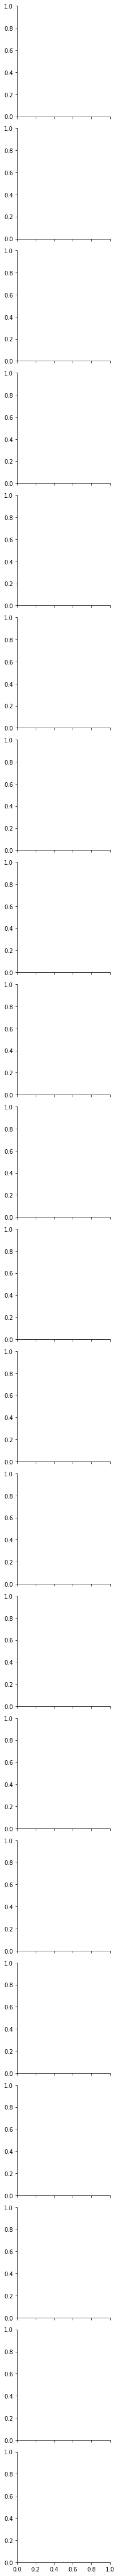

In [22]:
fg = sb.FacetGrid(data=gals_knownsource,row='Data_y')
fg.map(plt.scatter,'(m-M)o','MHI_x')

In [ ]:
fig = plt.figure()
ax = plt.gca()
ax.plot(gals_merged['vh(km/s)_x'] ,gals_merged['MHI_x'], 'o', c='blue')
ax.set_xlim((-600, 500))
ax.set_yscale('log')

In [ ]:
fig = plt.figure()
ax = plt.gca()
ax.plot(gals_cleaned['vh(km/s)_x'] ,gals_cleaned['M-m'], 'o', c='blue')
ax.set_xlim((-600, 500))
#ax.labels
#ax.set_yscale('log')

In [ ]:
gals_merged['dist_pc'] = np.sqrt((100*100**((gals_merged['M-m_x']/5))))

In [ ]:
gals_merged['dist_kpc'] = gals_merged['dist_pc']/1000

In [ ]:
gals_merged['dist_kpc'] = gals_merged['dist_pc']/1000

In [ ]:
gals_merged.columns

In [ ]:
gals_cleaned = gals_merged[gals_merged['(m-M)o_x'] != 99.99]
gals_cleaned = gals_merged[gals_merged['vh(km/s)_x'] != 999.9]

In [ ]:
radial_vel = gals_merged['vh(km/s)_x']


In [ ]:
fig = plt.figure()
ax = plt.gca()
ax.plot(gals_cleaned['vh(km/s)_x'] ,gals_cleaned['dist_kpc'], 'o', c='blue')
ax.set_xlim((-600, 500))
#ax.labels
#ax.set_yscale('log')

In [ ]:
gals_cleaned[['GalaxyName','vh(km/s)_x','dist_kpc']]

In [ ]:
gals_cleaned[gals_cleaned['GalaxyName'] == 'UrsaMinor']['vh(km/s)_x']

In [ ]:
fig = plt.figure()
ax = plt.gca()
ax.plot(gals_cleaned['vh(km/s)_x'] ,gals_cleaned['dist_kpc'], 'o', c='blue')
ax.set_xlim((-600, 500))
ax.set_ylim((0,1000))
plt.xlabel('Radial Velocity (km/s)')
plt.ylabel('Distance (kpc)')
plt.title('Radial Velocity vs. Distance')
#plt.rcParams["figure.figsize"] = [3,4]
#plt.figure(figsize=(3,4))
#ax.labels
#ax.set_yscale('log')

KeyError: 'dist_kpc'

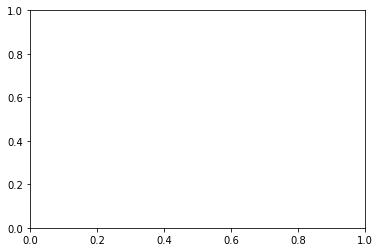

In [23]:
fig = plt.figure()
ax = plt.gca()
ax.plot(gals_cleaned['dist_kpc'] ,gals_cleaned['vh(km/s)_x'], 'o', c='blue')
#ax.set_ylim((-600, 500))
#ax.set_xlim((0,1500))
plt.xlabel('Distance (kpc)')
plt.ylabel('Radial Velocity (km/s)')
plt.title('D v Vr')
#ax.labels
#ax.set_yscale('log')
plt.savefig('DvsVr.png')

In [24]:
count = gals_cleaned[(gals_cleaned['vh(km/s)_x'] < 100.0) & (gals_cleaned['vh(km/s)_x'] > -100.0)]

In [25]:
count['vh(km/s)_x']

0      87.0
10    -39.2
11    -12.3
12     98.1
21     99.0
32    -55.3
36     45.2
38     55.3
46     30.9
47     78.0
84    -13.0
86    -54.5
87    -83.9
89     38.1
92     24.0
95    -78.5
96    -29.2
106   -65.0
110    62.0
111    92.0
112    63.3
116    56.0
119    67.0
Name: vh(km/s)_x, dtype: float64

In [26]:
count.count

<bound method DataFrame.count of            GalaxyName  RA1_x  RA2_x  RA3_x  Dec1_x  Dec2_x  Dec3_x  M-m_x  \
0          CanisMajor      7     12   35.0     -27      40       0  14.29   
10            SegueII      2     19   16.0      20      10      31  17.70   
11           Willman1     10     49   21.0      51       3       0  17.90   
12      ComaBerenices     12     26   59.0      23      54      15  18.20   
21          Bootes(I)     14      0    6.0      14      30       0  19.11   
32       UrsaMajor(I)     10     34   52.8      51      55      12  19.93   
36           Hercules     16     31    2.0      12      47      30  20.60   
38             Fornax      2     39   59.3     -34      26      57  20.84   
46   CanesVenatici(I)     13     28    3.5      33      33      21  21.69   
47              LeoII     11     13   28.8      22       9       6  21.84   
84            Phoenix      1     51    6.3     -44      26      41  23.09   
86            NGC6822     19     44   56.6 

In [27]:
gals_cleaned

,GalaxyName,RA1_x,RA2_x,RA3_x,Dec1_x,Dec2_x,Dec3_x,M-m_x,mystery1_x,mystery2_x,...,Dec3_y,M-m_y,mystery1_y,mystery2_y,vh(km/s)_y,mystery3_y,mystery4_y,MHI_y,Data_y,Notes_y
0,CanisMajor,7,12,35.0,-27,40,0,14.29,0.30,0.30,...,0,14.29,0.30,0.30,87.0,99.9,99.9,99.90,H,SKIP-FLUFFY STREAM
1,SagittariusdSph,18,55,19.5,-30,32,43,17.10,0.15,0.15,...,43,17.10,0.15,0.15,140.0,0.0,99.9,99.90,H,(I don’t understand where the limit in GP or M...
4,Segue(I),10,7,4.0,16,4,55,16.80,0.20,0.20,...,55,16.80,0.20,0.20,208.5,0.0,99.9,99.90,g30dr1,148+18s.mir stdev (0.04K/9.1K/Jy)*5 = 0.02 Jy ...
8,UrsaMajorII,8,51,30.0,63,7,48,17.50,0.30,0.30,...,48,17.50,0.30,0.30,-116.5,1.9,1.9,0.00,h,"130.0 60.0 CAR CAR_H07.fits stdev 0.02K, if b..."
9,BootesII,13,58,0.0,12,51,0,18.10,0.06,0.06,...,0,18.10,0.06,0.06,-117.0,5.2,5.2,0.00,g1dr2,212+10s.mir stdev 0.08K (rounded up)
10,SegueII,2,19,16.0,20,10,31,17.70,0.10,0.10,...,31,17.70,0.10,0.10,-39.2,2.5,2.5,99.90,g4dr2,"36+18s.mir stdev 0.07K, could get lower with a..."
11,Willman1,10,49,21.0,51,3,0,17.90,0.40,0.40,...,0,17.90,0.40,0.40,-12.3,2.5,2.5,0.00,h,NaN
12,ComaBerenices,12,26,59.0,23,54,15,18.20,0.20,0.20,...,15,18.20,0.20,0.20,98.1,0.9,0.9,0.00,g24dr1,188+26s.mir stdev 0.04K so same limit of 0.02 ...
14,BootesIII,13,57,12.0,26,48,0,18.35,0.10,0.10,...,0,18.35,0.10,0.10,197.5,3.8,3.8,99.90,g24dr1,212+26s.mir stdev 0.04K again so 0.02 Jy
16,LMC,5,23,34.5,-69,45,22,18.52,0.09,0.09,...,22,18.52,0.09,0.09,262.2,3.4,3.4,460.00,h,NaN


KeyError: 'dist_kpc'

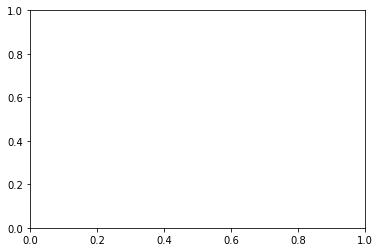

In [28]:
fig = plt.figure()
ax = plt.gca()
ax.plot(gals_cleaned['dist_kpc'] ,gals_cleaned['vh(km/s)_x'], 'o', c='blue')
ax.set_ylim((-600, 500))
ax.set_xlim((0,1000))
plt.xlabel('Distance (kpc)')
plt.ylabel('Radial Velocity (km/s)')
plt.title('D v Vr')
#ax.labels
#ax.set_yscale('log')

In [29]:
count = gals_cleaned[(gals_cleaned['dist_kpc'] < 590) & (gals_cleaned['dist_kpc'] > 350.0)]

KeyError: 'dist_kpc'

In [30]:
gals

NameError: name 'gals' is not defined

KeyError: 'dist_kpc'

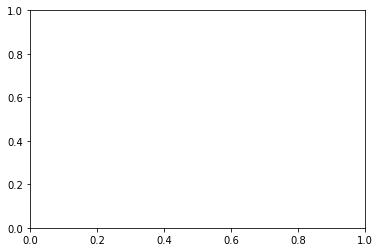

In [31]:
fig = plt.figure()
ax = plt.gca()
ax.plot(gals_cleaned['vh(km/s)_x'] ,gals_cleaned['dist_kpc'], 'o', c='blue')
ax.set_xlim((-600, 500))
ax.set_ylim((0,1500))
#ax.labels
#ax.set_yscale('log')

KeyError: 'dist_kpc'

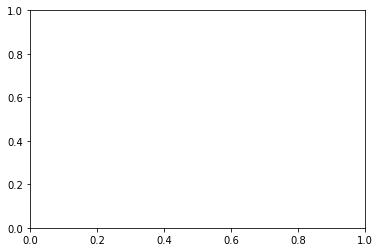

In [32]:
fig = plt.figure()
ax = plt.gca()
ax.plot(gals_cleaned['vh(km/s)_x'] ,gals_cleaned['dist_kpc'], 'o', c='blue')
ax.set_xlim((-600, 500))
ax.set_ylim((0,300))

#ax.labels
#ax.set_yscale('log')

Questions for Mary:
    
    What are the mystery columns?
    What does - in the notes of SE mean?
    What do the stars before the name mean?
    Believe MHI in which table?

TO DO:
    
    refer to /tables for galfa limits for associated datasource
    Double check optical velocity in master table
    Check that ones without radial vel in master haven't had something published
    Check that names matched correctly, no duplicates or partial names
    Replace and check missing data with nulls
    

In [33]:
gals_merged.columns

Index(['GalaxyName', 'RA1_x', 'RA2_x', 'RA3_x', 'Dec1_x', 'Dec2_x', 'Dec3_x',
       'M-m_x', 'mystery1_x', 'mystery2_x', 'vh(km/s)_x', 'mystery3_x',
       'mystery4_x', 'MHI_x', 'Data_x', 'Notes_x', 'RA1_y', 'RA2_y', 'RA3_y',
       'Dec1_y', 'Dec2_y', 'Dec3_y', 'M-m_y', 'mystery1_y', 'mystery2_y',
       'vh(km/s)_y', 'mystery3_y', 'mystery4_y', 'MHI_y', 'Data_y', 'Notes_y'],
      dtype='object')

In [34]:
g30dr1 the 30 in g30 refers to the integration time, used to determine 

SyntaxError: invalid syntax (<ipython-input-34-385c327fa50f>, line 1)

In [35]:
gals_merged[['GalaxyName','Data_y','MHI_x']]

,GalaxyName,Data_y,MHI_x
0,CanisMajor,H,99.90
1,SagittariusdSph,H,99.90
2,TucanaIII,H,99.90
3,DracoII,H,99.90
4,Segue(I),g30dr1,99.90
5,Reticulum2,h,99.90
6,CetusII,h,99.90
7,TriangulumII,g3dr2,99.90
8,UrsaMajorII,h,0.00
9,BootesII,g1dr2,0.00


In [36]:
i = 2
gals_merged.loc[i]

GalaxyName                                            TucanaIII
RA1_x                                                        23
RA2_x                                                        56
RA3_x                                                        36
Dec1_x                                                      -59
Dec2_x                                                       36
Dec3_x                                                        0
M-m_x                                                     17.01
mystery1_x                                                 0.16
mystery2_x                                                 0.16
vh(km/s)_x                                                999.9
mystery3_x                                                 99.9
mystery4_x                                                 99.9
MHI_x                                                      99.9
Data_x                                                        H
Notes_x       - Simon et al. 2017 V_hel 

# Check Mass Limits on Each Dwarf

Here I go through the table one by one and check mass limits where necessary with the appropriate information from the tables folder depending on the data source associated with that galaxy, and also check the galfa data for detections

In [37]:
#too see notes without them being truncated
pd.set_option("display.max_colwidth", 10000)

In [38]:
i = 3
gals_merged.loc[i][['GalaxyName','MHI_x','Data_y','Notes','dist_kpc']]

/Users/janagrc/.pyenv/versions/jupyter3/lib/python3.6/site-packages/pandas/core/series.py:951: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


GalaxyName    DracoII
MHI_x            99.9
Data_y              H
Notes             NaN
dist_kpc          NaN
Name: 3, dtype: object

In [39]:
gals_merged['MHI_x']

0       99.90
1       99.90
2       99.90
3       99.90
4       99.90
5       99.90
6       99.90
7       99.90
8        0.00
9        0.00
10      99.90
11       0.00
12       0.00
13      99.90
14      99.90
15      99.90
16     460.00
17      99.90
18      99.90
19      99.90
20     460.00
21       0.00
22       0.00
23       0.00
24      99.90
25      99.90
26      99.90
27      99.90
28       0.22
29       0.00
        ...  
96       0.95
97       0.28
98     450.00
99      51.00
100      0.73
101     77.00
102     14.00
103      2.60
104      0.94
105      0.73
106     99.90
107      0.34
108     87.00
109      6.60
110     17.00
111     99.90
112      2.50
113     99.90
114     11.00
115     18.00
116     29.00
117     13.00
118     35.00
119    860.00
120     52.00
121    180.00
122     43.00
123      0.88
124      7.90
125     48.00
Name: MHI_x, Length: 126, dtype: float64

# Contents of table files

In [40]:
galfa_unresolved_undetected = pd.read_csv('./tables/galfa_unresolved_undetected_clean.txt', delim_whitespace=True ,header=(0),comment='#')
galfa_unresolved_undetected

,GalaxyName,rh,MHI,std30_med_g,std30_med_h,MHI_g,MHI_h
0,BootesIII,99.99,99.9,0.037923,NaN,17.09138,NaN
1,CanesVenaticiII,1.60,0.0,0.078217,0.013089,519.00588,474.21009
2,PiscesII,1.10,99.9,0.037429,NaN,321.42495,NaN
3,Pegasus3,1.30,99.9,NaN,NaN,NaN,NaN
4,AndromedaXI,0.71,0.0,0.069377,0.012132,9707.05599,9268.51441
5,AndromedaXX,0.53,99.9,0.075920,0.017230,10819.92472,13407.35803
6,AndromedaXIII,0.78,0.0,0.076044,0.018760,13897.46464,18719.38047
7,AndromedaXIV,1.70,0.0,0.029043,0.016321,4752.33774,14581.57512
8,AndromedaXII,1.20,0.0,0.070827,0.016336,15851.40892,19962.45423
9,AndromedaXXIX,1.70,99.9,0.036159,NaN,5012.81372,NaN


In [41]:
galfa_resolved_undetected = pd.read_csv('./tables/galfa_resolved_undetected_table_clean.txt', delim_whitespace=True ,header=(0),comment='#')
galfa_resolved_undetected

,GalaxyName,med_std,v_-5,v_-4,v_-3,v_-2,v_-1,v_0,v_+1,v_+2,v_+3,v_+4,v_+5,MHI_limit
0,Segue(I),0.017123,0.020954,0.020997,0.019659,0.018380,0.017681,0.017123,0.016192,0.014794,0.013582,0.012936,0.012643,9.33124
1,TriangulumII,0.033360,0.032310,0.035480,0.041173,0.044659,0.043152,0.037963,0.033360,0.031326,0.029874,0.027878,0.025896,31.59340
2,BootesII,0.020185,0.026547,0.024216,0.020185,0.016058,0.013231,0.013089,0.015978,0.019443,0.021502,0.022890,0.023712,36.42430
3,SegueII,0.019513,0.019513,0.021121,0.021463,0.019757,0.017380,0.016138,0.016102,0.016821,0.018150,0.019659,0.020971,24.36050
4,ComaBerenices,0.011513,0.017993,0.018037,0.017272,0.016089,0.014207,0.011513,0.009089,0.007597,0.006588,0.006316,0.006658,22.78040
5,Bootes(I),0.024946,0.020448,0.019055,0.019703,0.021678,0.023773,0.025247,0.025994,0.026299,0.026131,0.025314,0.024946,114.12000
6,Hercules,0.028245,0.027603,0.028245,0.029470,0.030828,0.031628,0.031415,0.029572,0.026164,0.023573,0.024793,0.027962,509.70000
7,LeoIV,0.018579,0.023945,0.019971,0.017264,0.017018,0.018579,0.019500,0.019310,0.018564,0.018563,0.019044,0.018400,458.54800
8,CanesVenaticu(I),0.016252,0.024369,0.021633,0.018487,0.016273,0.015959,0.016252,0.016039,0.015467,0.015233,0.015825,0.016702,800.34100
9,LeoI,0.031631,0.029137,0.030867,0.033413,0.036775,0.037608,0.034692,0.030318,0.027769,0.028897,0.031631,0.032785,2110.97000


In [42]:
hi4pi_resolved_undetected = pd.read_csv('./tables/hi4pi_resolved_undetected_table_clean.txt', delim_whitespace=True ,header=(0),comment='#')
hi4pi_resolved_undetected

,GalaxyName,med_std,v_-5,v_-4,v_-3,v_-2,v_-1,v_0,v_+1,v_+2,v_+3,v_+4,v_+5
0,UrsaMajorII,0.33041,0.29192,0.29070,0.29266,0.39312,0.52351,0.51525,0.36989,0.29312,0.32788,0.34514,0.33041
1,Tucana2,0.11744,0.13279,0.13210,0.09946,0.07456,0.08875,0.11781,0.13724,0.12786,0.10454,0.10228,0.11744
2,Draco,0.21153,0.12404,0.10974,0.13890,0.15178,0.21153,0.28788,0.29272,0.25904,0.24986,0.21300,0.14644
3,SextansI,0.57736,0.42631,0.48201,0.57736,0.65398,0.65606,0.67766,0.70233,0.59833,0.49953,0.56530,0.52435
4,UrsaMajorI,1.12877,0.75418,0.87294,0.96666,1.03453,1.08105,1.12877,1.20459,1.30527,1.38664,1.41153,1.41080


In [43]:
hi4pi_unresolved_undetected = pd.read_csv('./tables/hi4pi_unresolved_undetected_clean.txt', delim_whitespace=True ,header=(0),comment='#')
hi4pi_unresolved_undetected

,GalaxyName,rh,MHI,std30_med,Notes
0,TucanaIII,6.00,99.90,0.020382,NaN
1,DracoII,2.70,99.90,0.017329,NaN
2,Reticulum2,3.64,99.90,0.020559,NaN
3,CetusII,1.90,99.90,NaN,no v
4,Willman1,2.30,0.00,0.019376,NaN
5,TucanaIV,9.10,99.90,NaN,no v
6,GrusII,6.00,99.90,NaN,no v
7,TucanaV,1.00,99.90,NaN,no v
8,SagittariusII,2.00,99.90,NaN,no v
9,HorologiumII,2.09,99.90,NaN,no v


Sanity check on conversion factor (e.g. from all_notebooks/Unresolved Undetected.ipynb):
 MHI = (2.36x10**5)(D**2 mpc)(Stot) for unresolved

x = 2.361e5 dmpc = dist(objname)/1e3 #mpc tflux = 0.030336279 #put in by hand because every table different/not exactly formatted stot = tflux10 #tflux always multiplied by 10km/s

#galfa: 9.1 k/Jy hi4pi: .6 jy/k g = 1/9.1 h = .6

MHI = x(dmpc**2)(stot*g) #multiply by 'h' or 'g' (hi4pi or galfa) to convert to janskys y = MHI '%.5f'%(y) #show 5 decimal points

Do any of the dwarfs have velocities in Simon 2019 that aren't listed in our list?


In [44]:
gals_merged['MHI'] = np.nan
gals_merged['MHI_source'] = np.nan
gals_merged['MHI_type'] = np.nan

In [45]:
gals_merged.columns

Index(['GalaxyName', 'RA1_x', 'RA2_x', 'RA3_x', 'Dec1_x', 'Dec2_x', 'Dec3_x',
       'M-m_x', 'mystery1_x', 'mystery2_x', 'vh(km/s)_x', 'mystery3_x',
       'mystery4_x', 'MHI_x', 'Data_x', 'Notes_x', 'RA1_y', 'RA2_y', 'RA3_y',
       'Dec1_y', 'Dec2_y', 'Dec3_y', 'M-m_y', 'mystery1_y', 'mystery2_y',
       'vh(km/s)_y', 'mystery3_y', 'mystery4_y', 'MHI_y', 'Data_y', 'Notes_y',
       'MHI', 'MHI_source', 'MHI_type'],
      dtype='object')

In [46]:
#Assign MHI to gals merged based on if it's in a given table
for i, row in gals_merged.iterrows():
    for j, row in galfa_unresolved_undetected.iterrows():
        if (galfa_unresolved_undetected['GalaxyName'][j] == gals_merged['GalaxyName'][i]):
            gals_merged['MHI'][i] = min(galfa_unresolved_undetected['MHI_g'][j],galfa_unresolved_undetected['MHI_h'][j])
            if (gals_merged['MHI'][i] == galfa_unresolved_undetected['MHI_g'][j]):
                gals_merged['MHI_source'][i] = 'galfa'
                gals_merged['MHI_type'][i] = 'upper_limit'
            elif (gals_merged['MHI'][i] == galfa_unresolved_undetected['MHI_h'][j]):
                gals_merged['MHI_source'][i] = 'hi4pi'
                gals_merged['MHI_type'][i] = 'upper_limit'
            print(galfa_unresolved_undetected['GalaxyName'][j],gals_merged['GalaxyName'][i],gals_merged['MHI'][i],gals_merged['GalaxyName'][i],gals_merged['MHI_source'][i],gals_merged['MHI_type'][i])
    for k, row in galfa_resolved_undetected.iterrows():
        if (galfa_resolved_undetected['GalaxyName'][k] == gals_merged['GalaxyName'][i]):
            gals_merged['MHI'][i] = galfa_resolved_undetected['MHI_limit'][k]
            gals_merged['MHI_source'][i] = 'galfa'
            gals_merged['MHI_type'][i] = 'upper_limit'
            print(galfa_resolved_undetected['GalaxyName'][k],gals_merged['GalaxyName'][i],gals_merged['MHI'][i],gals_merged['GalaxyName'][i],gals_merged['MHI_source'][i],gals_merged['GalaxyName'][i],gals_merged['MHI_type'][i])
    for l, row in hi4pi_resolved_undetected.iterrows():
        if (hi4pi_resolved_undetected['GalaxyName'][l] == gals_merged['GalaxyName'][i]):
            gals_merged['MHI'][i] = hi4pi_resolved_undetected['med_std'][l]*0.6*10*2.36E5*(gals_merged['dist_mpc'][i]*gals_merged['dist_mpc'][i])
            gals_merged['MHI_source'][i] = 'hi4pi'
            gals_merged['MHI_type'][i] = 'upper_limit'
            print(hi4pi_resolved_undetected['GalaxyName'][l],gals_merged['GalaxyName'][i],gals_merged['MHI'][i],gals_merged['GalaxyName'][i],gals_merged['MHI_source'][i],gals_merged['GalaxyName'][i],gals_merged['MHI_type'][i])
    for m, row in hi4pi_unresolved_undetected.iterrows():
        if (hi4pi_unresolved_undetected['GalaxyName'][m] == gals_merged['GalaxyName'][i]):
            #gals_merged['MHI'][i] = 'INSERT HI4PI UNRESOLVED UNDETECTED CALC HERE'
            #hi4pi_unresolved_undetected['std30_med'][m] is 1 sig in K
            gals_merged['MHI'][i] = hi4pi_unresolved_undetected['std30_med'][m]*0.6*10*2.36E5*(gals_merged['dist_mpc'][i]*gals_merged['dist_mpc'][i])
            gals_merged['MHI_source'][i] = 'hi4pi'
            gals_merged['MHI_type'][i] = 'upper_limit'
            print(hi4pi_unresolved_undetected['GalaxyName'][m],gals_merged['GalaxyName'][i],gals_merged['MHI'][i],gals_merged['GalaxyName'][i],gals_merged['MHI_source'][i],gals_merged['GalaxyName'][i],gals_merged['MHI_type'][i])
    if((gals_merged['MHI_x'][i] != 99.9) & (gals_merged['MHI_x'][i] != 0) ):
        gals_merged['MHI'][i] = 10**(gals_merged['MHI_x'][i])
        if (gals_merged['MHI'][i] > 1E13):
            gals_merged['MHI'][i] = np.nan
        gals_merged['MHI_source'][i] = 'various'
        gals_merged['MHI_type'][i] = 'detected_mass'
        print(gals_merged['GalaxyName'][i],gals_merged['MHI_x'][i],gals_merged['MHI'][i],gals_merged['MHI_source'][i],gals_merged['MHI_type'][i])   

KeyError: 'dist_mpc'

In [ ]:
gals_merged[gals_merged['GalaxyName'] == 'PiscesII']

In [47]:
gals_merged[['GalaxyName','MHI','MHI_source','MHI_type','dist_mpc']]

KeyError: "['dist_mpc'] not in index"

In [48]:
#print(gals_merged['GalaxyName'][(gals_merged['dist_mpc'] > 2)])
gals_merged[['GalaxyName','MHI_x']]

,GalaxyName,MHI_x
0,CanisMajor,99.90
1,SagittariusdSph,99.90
2,TucanaIII,99.90
3,DracoII,99.90
4,Segue(I),99.90
5,Reticulum2,99.90
6,CetusII,99.90
7,TriangulumII,99.90
8,UrsaMajorII,0.00
9,BootesII,0.00


KeyError: 'dist_kpc'

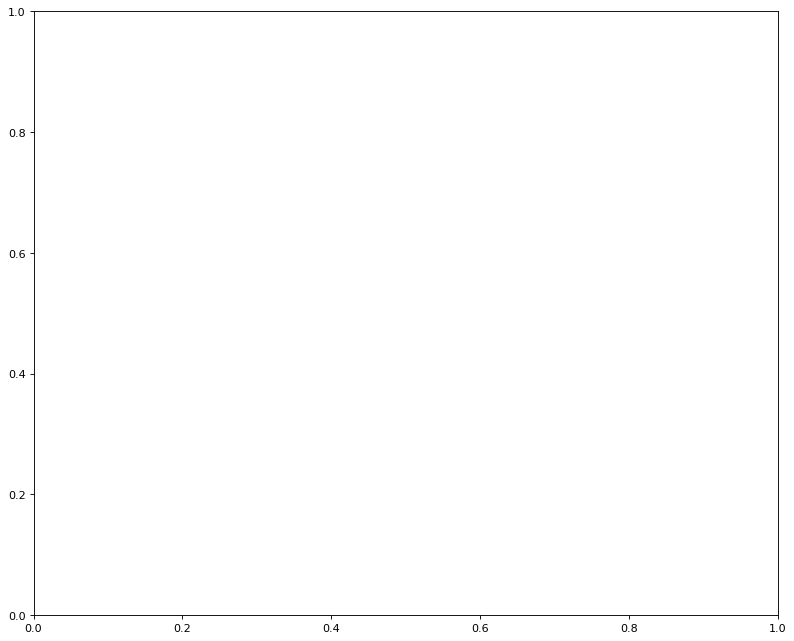

In [49]:
fig = plt.figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')
ax = plt.gca()
ax.plot(gals_merged['dist_kpc'] ,gals_merged['MHI'], 'o')
#ax.set_xscale('log')
#ax.set_yscale('log')
#ax.set_ylim(0,1E10)
#ax.set_xlim(0,4000)
plt.xlabel('Distance (kpc)')
plt.ylabel('MHI')
plt.title('D_kpc v M_HI')
for i, txt in enumerate(gals_merged.GalaxyName):
    if((pd.notnull(gals_merged['dist_kpc'][i])) & (pd.notnull(gals_merged['MHI'][i]))):
            ax.annotate(txt,(gals_merged.dist_kpc.iat[i],gals_merged.MHI.iat[i]))
plt.show()
#ax.labels


In [50]:
f = open('./tables/galfa_novelocity.txt', 'r')
galfa_novelocity = f.read()
print(galfa_novelocity)

objname med [-750,750]

Pegasus3  0.05  1.52588e-05  1.52588e-05  1.52588e-05  1.52588e-05  12.1519  0.0702109  0.0618136  0.0517987  0.0530429  0.0520472  0.0490439  0.0577243  0.0649711  0.0640193  0.0583398  0.0616273  0.0610166  0.0606604  0.0606195  0.0600511  0.0590834  0.0600789  0.0539868  0.0593914  0.0570374  0.051261  0.0493445  0.052955  0.0580543  0.0548736  0.0566315  0.0531541  0.0661943  0.0604239  0.0613946  0.0630281  0.0565188  0.0604295  0.0542074  0.0590638  0.0609341  0.0594279  0.0529537  0.049812  0.0522583  0.062024  0.0644537  0.0616792  0.0544615  0.0519843  0.0590311  0.0552025  0.0588218  0.0589235  0.0531167  0.0584452  0.0530618  0.0570667  0.0606538  0.0574894  0.0611518  0.0546851  0.0544044  0.0576308  0.0580237  0.053551  0.0504879  0.0584247  0.0617798  0.0594454  0.056075  0.0536369  0.0529034  0.0797229  1.81794  1.67411  0.725981  0.074725  0.0593904  0.0552568  0.0437913  0.0423353  0.0531145  0.0481564  0.0434575  0.0395965  0.0398368  0.0431991

NearbyGalaxies (not se) is the master table representing an extended version from Mcconnachie 2012 in which mass limits were being added into and will serve as the resource for the tables in the paper. As an example, Segue I has a mass limit that was added from Data gs. The Key says if it's an upper limit, etc. See the notes for which the columns are defined.

For all galfa limits, check images (in images folder) or create if doesn't exist. Pull relevant mass limit from tables folder

Sanity check on conversion factor (e.g. from all_notebooks/Unresolved Undetected.ipynb):
    
    # MHI = (2.36x10**5)(D**2 mpc)(Stot) for unresolved
x = 2.36*1e5
dmpc = dist(objname)/1e3  #mpc 
tflux = 0.030336279 #put in by hand because every table different/not exactly formatted
stot = tflux*10 #tflux always multiplied by 10km/s

#galfa: 9.1 k/Jy hi4pi: .6 jy/k
g = 1/9.1 
h = .6


MHI = x*(dmpc**2)*(stot*g) #multiply by 'h' or 'g' (hi4pi or galfa) to convert to janskys 
y = MHI
'%.5f'%(y)  #show 5 decimal points

Do any of the dwarfs have velocities in Simon 2019 that aren't listed in our list?

In [51]:
f = open('./NearbyGalaxies.dat', 'r')
masterList = f.read()
print(masterList)

#Galaxy Name
#Right Ascension (hours minutes seconds) 
#Declination (degrees arcminutes arcseconds)
#Foreground reddening, E(B-V), measured directly from the Schlegel et al 1998 maps (they do not include the recalibration by Schlafly & Finbiener 2011)
#Distance Modulus, (m-M)o err+ err-  
#Heliocentric radial velocity, vh(km/s) err+ err- 
#Apparent V magnitude in Vega mags, Vmag err+ err- 
#Position Angle of major axis in degrees measured east from north, PA err+ err- 
#Projected ellipticity, e=1-b/a err+ err- 
#Central V surface brightness, muVo(mag/sq.arcsec) err+ err-
#Half-light radius measured on major axis, rh(arcmins) err+ err-
#Stellar radial velocity dispersion, sig_s(in km/s) err+ err-
#Stellar peak/max rotation velocity, vrot_s(in km/s) err+ err-
#Log Mass of HI (calculated for the adopted distance modulus), M_HI 
#Data, g - galfa, gs - smoothed galfa, h - hi4pi
#Key, u - upper limit, unv - upper limit no velocity, maybe reference code for detections?
#HI radial velocity dis

# Check for newly measured velocities

Some listed in the novelocity tables now have velocities (Simon 2019) 

The following have new velocities and these should be added to master from Simon: Pegasus3, Sagittarius, HorologiumI, ReticulumII, EradinusII

The following are not in the Simon table at all and should be checked to see if they have another name: Eradanus3, Indus1, IndusI? (these are not the same, see Mcconnachie 2012)

The following And dwarfs not in Simon table And XXXII, And XXXI, And XXXIII

In [52]:
Pegasus3

NameError: name 'Pegasus3' is not defined

In [53]:
In the images folder there are 

SyntaxError: invalid syntax (<ipython-input-53-270be6312652>, line 1)

Check HI4PI noise values for TriangulumII, LeoI, AndXIX

Additional dwarfs from Simon